In [23]:
import pandas as pd
import numpy as np

#Reading the data file using pandas and looking at the first 20 rows of the data
data = pd.read_csv('titanic3.csv')
data.head(20)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [24]:
#Replacing the empty cells with numpy NaN value
#We also update the 'age' and 'fare' column as numeric data types
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

<AxesSubplot: xlabel='survived', ylabel='fare'>

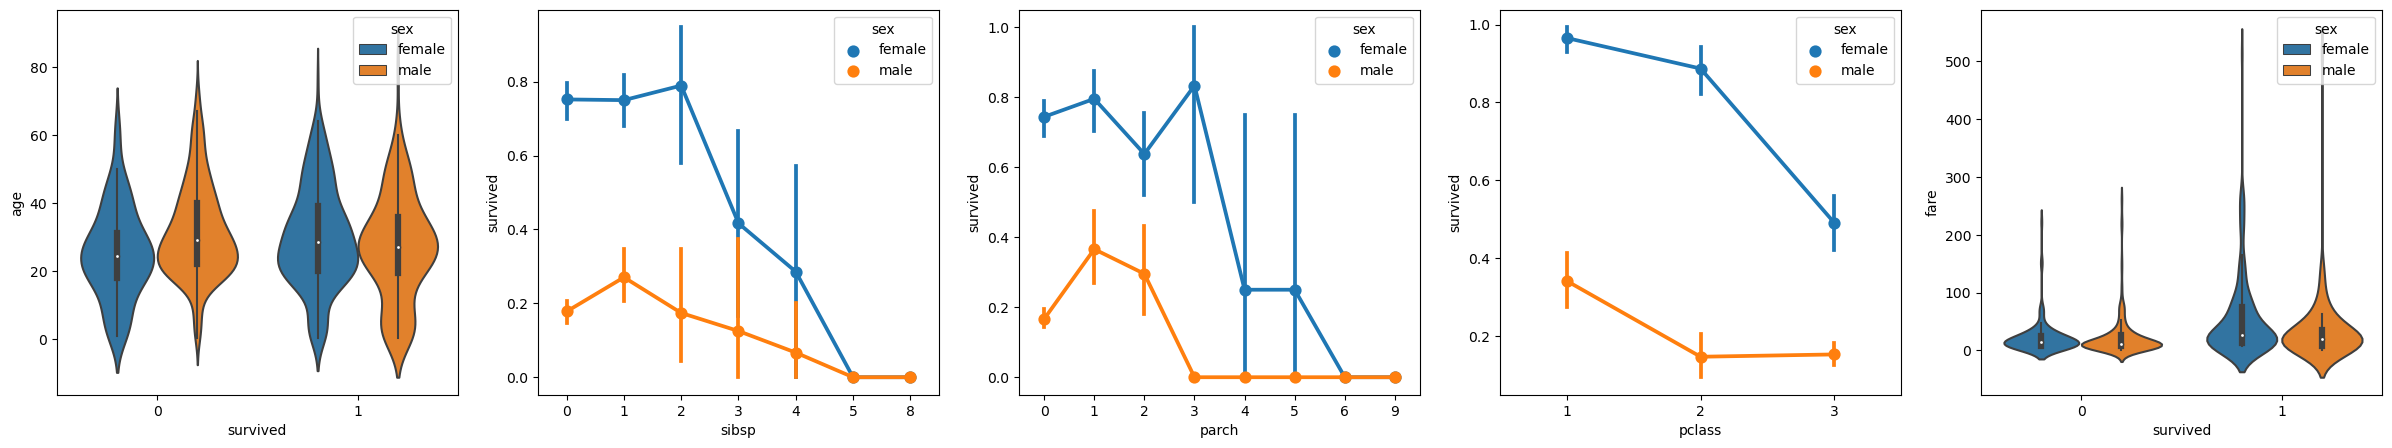

In [25]:
#Visualizing the data using seaborn and matplotlib

import seaborn as sns
import matplotlib.pyplot as plt

#The goal here is to see the correlation between different parameters and survivability based on sex
fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [27]:
#Converting the string values of the 'sex' column as integers
data.replace({'male': 1, 'female': 0}, inplace=True)

In [30]:
#Calculating the correlation value of the data based on survivability
data.corr(numeric_only=True).abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


In [18]:
'''
From the above data we know that 'sex', 'pclass' and 'fare' clearly plays dominant role for survival, whereas 'parch', 'sibsp' and 'age' 
have very little correlation with survival.

Note that 'sibsp=siblings+spouse' and 'parch=parents+children'. This implies that we can group these two columns and form a single column 
called 'relatives' to see its connection with survival.
'''

"\nFrom the above data we know that 'sex', 'pclass' and 'fare' clearly plays dominant role for survival, whereas 'parch', 'sibsp' and 'age' \nhave very little correlation with survival.\n\nNote that 'sibsp=siblings+spouse' and 'parch=parents+children'. This implies that we can group these two columns and form a single column \ncalled 'relatives' to see its connection with survival.\n"

In [31]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr(numeric_only=True).abs()[["survived"]]

#We can now drop 'sibsp' and 'parch' columns from the data. We can also drop all the rows that have a NaN value.
#This will create a new dataset that can be used for training a model



,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


In [32]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

In [33]:
data.head(20)

,sex,pclass,age,relatives,fare,survived
0,0,1,29.00,0,211.3375,1
1,1,1,0.92,1,151.5500,1
2,0,1,2.00,1,151.5500,0
3,1,1,30.00,1,151.5500,0
4,0,1,25.00,1,151.5500,0
5,1,1,48.00,0,26.5500,1
6,0,1,63.00,1,77.9583,1
7,1,1,39.00,0,0.0000,0
8,0,1,53.00,1,51.4792,1
9,1,1,71.00,0,49.5042,0
